# TP6.6 - Construire des modèles complexes (Approche fonctionnelle)

Keras propose une API qui permet de construire des modèles de DNN complexe en se basant sur une modélisation fonctionnelle.</br>
Le modèle fonctionnelle est assez simple à appréhender, on l'écrit comme une fonction mathématique:

$ x=tf.keras.layers.Input(10), y=f(x); z=(g(y); u=concat(f(x),g(y))$</br>
Prenons par exemple le modèle: la couche de normalisation est concaténée avec la couche hidden 2.
<figure>
    <img src="../images/functionalModel.jpg"  style="width:240px;height:300px;" >
</figure>

input_ = tf.keras.layers.Input(X_train.shape[1])</br>
normalized_input = tf.keras.layers.Normalization()(input_)</br>
hidden1 = tf.keras.layers.Dense(????, activation="???")(normalized_input)</br>
hidden2 = tf.keras.layers.Dense(????, activation="????")(hidden1)</br>
concat = tf.keras.layers.Concatenate()([normalized_input, hidden2])</br>
output = tf.keras.layers.Dense(1, activation="sigmoid")(concat)</br>



model = tf.keras.Model(inputs=[input_], outputs=[output])</br></br>



On peut construire aisément des architectures sophistiquées.
- On peut imaginer par exemple que les hidden couches 1 et 2 sont concaténées.
- la Hidden 1 est remise à la sortie de hidden 1.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input , Concatenate
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [26]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    # Define the true positives, false positives and false negatives
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

    # Calculate the precision and recall
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    # Calculate the F1 score
    f1_score = 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    return f1_score

## Réseaux de neurones avec une sortie sigmoide  sigmoïde


### 1 Le DataSet
On utilisera le Dataset smoking,

In [27]:
# Lecture du dataset n permet de limiter le nombre de lignes à lire
# Pour faciliter les tests
import pandas as pd
def load_data(n):
    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv')
    return data[0:n]

def select_variables(data):
    data.dropna(axis=0, inplace=True)
    y = data['smoking'] # récupérer la colonne survived et la mettre dans y
    # récuperer le reste des données dans X utiliser la fonction titanic.drop ???, ??? )
    X = data.drop('smoking', axis=1)
    return X,y



## 2 Préparation des données

#### 2.1. Split des données

In [28]:
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [29]:
## On peut utiliser une simple normalisation (x-mu)/ecart type)
def normaliser(X_train, X_test):
    mean = X_train.mean()
    std  = X_train.std()
    X_train = (X_train - mean) / std
    X_test  = (X_test  - mean) / std

    return X_train, X_test

In [30]:
# Préparation ds données
# le -1 du load_data(-1) veut dire on prend toutes les lignes
data=load_data(-1)
# sélectionner les variables
X,y = select_variables(data)
X_train, X_test, y_train, y_test = split_data(X,y)
X_train, X_test = normaliser(X_train, X_test)
print("X_train.shape", X_train.shape, "X_test.shape", X_test.shape)

X_train.shape (127404, 23) X_test.shape (31851, 23)


## 3. Définition du modèle de régression linaire

On définit un modèle avec deux branches
- une branche : une réseau à 2 couches  à 50 neurones avec un relu
- une branche : un réseau

#### 3.1 Un réseau de neurones complexe à plusieurs couches

In [31]:

input_ = tf.keras.layers.Input(X_train.shape[1])
normalized_input = Dense(10, activation='relu')(input_)
hidden1 = Dense(50, activation='relu')(normalized_input)
hidden2 = Dense(50, activation='relu')(hidden1)
concat = Concatenate()([normalized_input, hidden2])
output = Dense(1, activation='sigmoid')(concat)

model = Model(inputs=input_, outputs=output)


#Compiler le modèle
model.compile(optimizer='adam',
              loss= 'BinaryCrossentropy',
              metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 23)]                 0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 10)                   240       ['input_4[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 50)                   550       ['dense_6[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 50)                   2550      ['dense_7[0][0]']             
                                                                                              

### 4. Entrainement du modèle (Model training)

In [32]:
# Entrainement du modele
history  = model.fit(X_train,
                     y_train,
                     epochs=10,
                     batch_size= 10,
                     verbose=False,
                     validation_data = (X_test, y_test))
#model.metrics_names

### 5. Evaluation des performances du modèle
Utilisation de  MAE = Mean Absolute Error (between the labels and predictions),
la loss, le R2 score


In [33]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss     :', score[0])
print('Test accuracy :', score[1])
#print('Test f1 score :', score[2])

Test loss     : 0.4579586684703827
Test accuracy : 0.7708706259727478


### Historique du Training (training history)
Quel était le meilleur résultat prendant l'entrainement

In [34]:
print(history.params)
print(history.history.keys())
#print(history.history['loss'])

{'verbose': False, 'epochs': 10, 'steps': 12741}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [35]:
import pandas as pd
df=pd.DataFrame(data=history.history)
display(df)

loss  accuracy  val_loss  val_accuracy
0  0.471849  0.762731  0.465002      0.766695
1  0.460264  0.770729  0.462332      0.769081
2  0.457361  0.772150  0.461986      0.770400
3  0.455792  0.772605  0.462017      0.771530
4  0.454479  0.773696  0.461550      0.770996
5  0.453483  0.774175  0.459602      0.771844
6  0.452546  0.774458  0.459553      0.772503
7  0.452031  0.775400  0.460361      0.770619
8  0.451763  0.775619  0.458858      0.771404
9  0.451272  0.776381  0.457959      0.770871

Text(0.5, 1.0, 'Accuracy ')

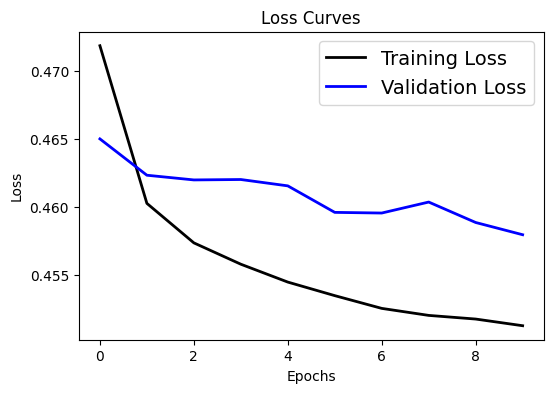

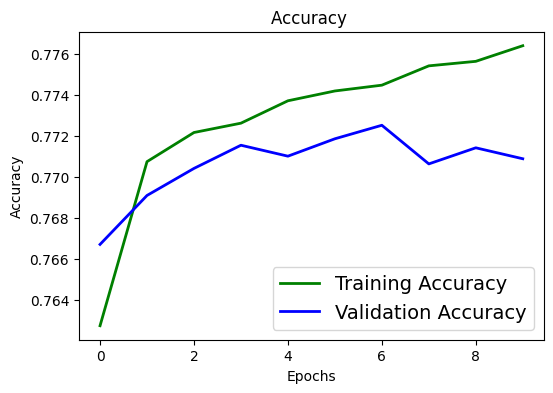

In [36]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Plotting the Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'green', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy ', fontsize=12)


996/996 [==============================] - 3s 3ms/step


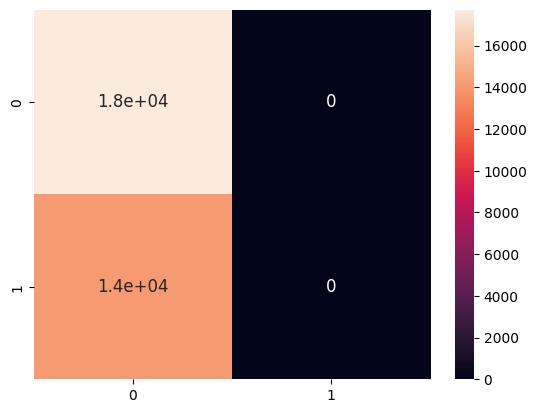

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)

# Predict probabilities
y_pred = model.predict(X_test)

# Get class labels
y_classes = np.argmax(y_pred, axis=-1)
#y_classes = np.where(predictions > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_classes)
#disp= ConfusionMatrixDisplay(confusion_matrix=cm)

sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()


### Save History and model

In [38]:
#Saving:

np.save('my_history_sd_1n.npy',history.history)
#np.save('my_history_sd_MLP.npy',history.history)
#np.save('my_history_Ld_1n.npy',history.history)
#np.save('my_history_Ld_MLP.npy',history.history)

In [39]:
#Loading:

history=np.load('my_history.sd_1n.npy',allow_pickle='TRUE').item()


FileNotFoundError: ignored

### 6. Faire des prédictions

In [40]:
#Small Sata set
my_data = [ -0.25, -0.75, 0.78]
survived = 0
my_data=np.array(my_data).reshape(1,3)


In [41]:
predictions = model.predict( my_data )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(survived))


ValueError: ignored

## Question:
- Comparer les deux modèles (simple versus complexe)